In [104]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from sklearn.model_selection import GridSearchCV

In [54]:
vdf = pd.read_csv("vehicle.csv")

In [55]:
vdf.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [56]:
vdf.shape

(846, 19)

## Performing EDA

In [57]:
##Check for NULL Values
vdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

circularity, class, hollow_ratio,max.length_rectangularity, , max.length_aspect_ratio, compactness has no missing values rest all features are having some kind of missing values 

In [58]:
#display in each column how many null values are there
vdf.apply(lambda x: sum(x.isnull()))

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [59]:
#Replacing the NULL values with its Median value

In [60]:
#Let's Perform label encoding on "Class" attribute so that we can use SimpleImputer to remove all the NULL values.

In [61]:
le = LabelEncoder() 
columns = vdf.columns
vdf['class'] = le.fit_transform(vdf['class'])

In [62]:
newdf = vdf.copy()

X = newdf.iloc[:,0:19] 
imputer = SimpleImputer(missing_values=np.nan, strategy='median', verbose=1)
transformed_values = imputer.fit_transform(X)
column = X.columns
print(column)
newdf = pd.DataFrame(transformed_values, columns=column)
newdf.describe()

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.823877,82.100473,168.874704,61.677305,8.567376,168.887707,40.936170,20.580378,147.998818,188.596927,439.314421,174.706856,72.443262,6.361702,12.600473,188.918440,195.632388,0.977541
std,8.234474,6.134272,15.741569,33.401356,7.882188,4.601217,33.197710,7.811882,2.588558,14.515652,31.360427,176.496341,32.546277,7.468734,4.903244,8.930962,6.152247,7.438797,0.702130
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000,0.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.250000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000,0.000000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000,1.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,586.750000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000,1.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000,2.000000


In [63]:
#Lets check the NULL values in the new Data Set

In [64]:
newdf.apply(lambda x: sum(x.isnull()))

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [65]:
# No NULL values in the new data set

In [66]:
newdf.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.823877,6.134272,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.100473,15.741569,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.874704,33.401356,104.0,141.00,167.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.677305,7.882188,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter_ratio,846.0,168.887707,33.197710,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.936170,7.811882,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.580378,2.588558,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


Most of the Attributes has mean and median values almost similar, it signifies that it is normally distribited and has no skewness/outlier

scatter_ratio feature seems to be having some kind of skewness and outlier
Scaled_Variance and Scaled_Variance.1 are having high skewness and presence of Outliers

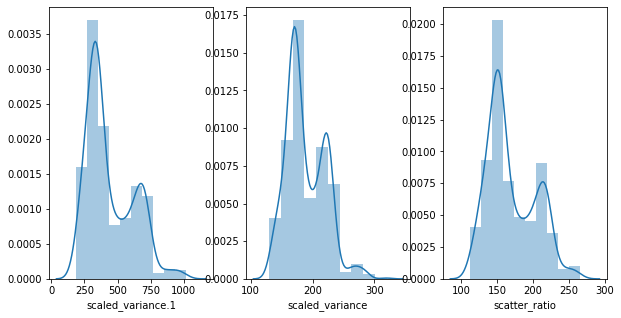

In [67]:
f, ax = plt.subplots(1, 3, figsize=(10,5))
vis1 = sns.distplot(newdf["scaled_variance.1"],bins=10, ax= ax[0])
vis2 = sns.distplot(newdf["scaled_variance"],bins=10, ax=ax[1])
vis3 = sns.distplot(newdf["scatter_ratio"],bins=10, ax=ax[2])

scaled variance, scaled Variance 1 and scatter_ratio, seems to be right skwed

In [68]:
#Lets Check the Skew value  for each attribute 
skewValue = newdf.skew()
skewValue

compactness                    0.381271
circularity                    0.264928
distance_circularity           0.108718
radius_ratio                   0.397572
pr.axis_aspect_ratio           3.835392
max.length_aspect_ratio        6.778394
scatter_ratio                  0.608710
elongatedness                  0.046951
pr.axis_rectangularity         0.774406
max.length_rectangularity      0.256359
scaled_variance                0.655598
scaled_variance.1              0.845345
scaled_radius_of_gyration      0.279910
scaled_radius_of_gyration.1    2.089979
skewness_about                 0.780813
skewness_about.1               0.689014
skewness_about.2               0.249985
hollows_ratio                 -0.226341
class                          0.031106
dtype: float64

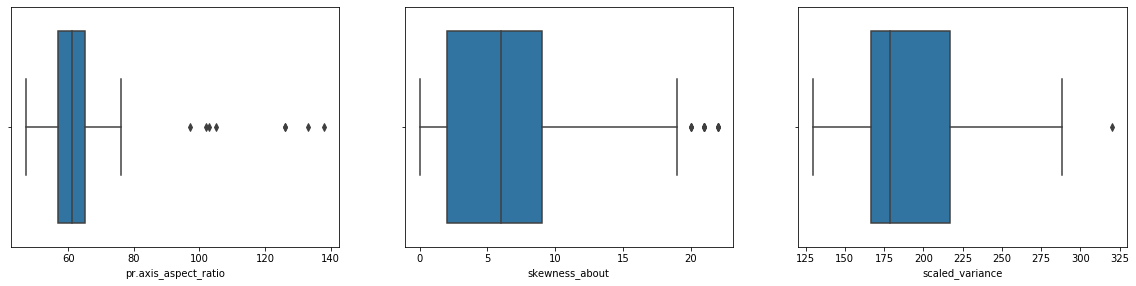

In [69]:
#Plotting Box Plot for Attributes with high Skewness
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= newdf['pr.axis_aspect_ratio'])

plt.subplot(3,3,2)
sns.boxplot(x= newdf.skewness_about)

plt.subplot(3,3,3)
sns.boxplot(x= newdf.scaled_variance)

plt.show()

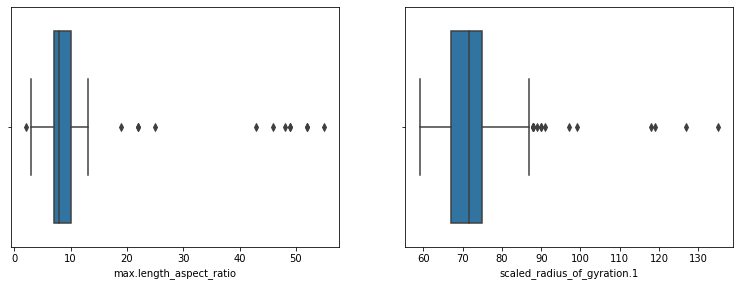

In [70]:
plt.figure(figsize= (20,15))

plt.subplot(3,3,2)
sns.boxplot(x= newdf['scaled_radius_of_gyration.1'])

plt.subplot(3,3,1)
sns.boxplot(x= newdf['max.length_aspect_ratio'])

In [71]:
#Treating the Outliers using the IQR formula. Removing the Outliers where the value is more than 1.5 times the IQR



Q1 = newdf.quantile(0.25)
Q3 = newdf.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

compactness                     13.00
circularity                      9.00
distance_circularity            28.00
radius_ratio                    54.00
pr.axis_aspect_ratio             8.00
max.length_aspect_ratio          3.00
scatter_ratio                   51.00
elongatedness                   13.00
pr.axis_rectangularity           4.00
max.length_rectangularity       22.00
scaled_variance                 50.00
scaled_variance.1              268.50
scaled_radius_of_gyration       49.00
scaled_radius_of_gyration.1      8.00
skewness_about                   7.00
skewness_about.1                14.00
skewness_about.2                 9.00
hollows_ratio                   10.75
class                            1.00
dtype: float64


In [72]:
cleandf = newdf[~((newdf < (Q1 - 1.5 * IQR)) |(newdf > (Q3 + 1.5 * IQR))).any(axis=1)]
cleandf.shape

(813, 19)

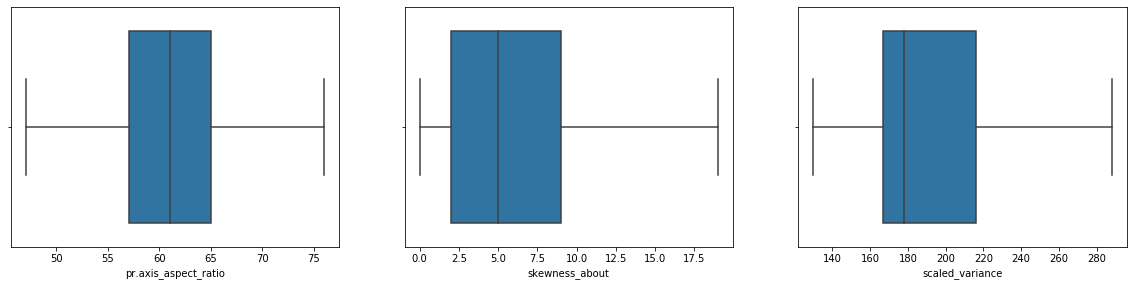

In [74]:
#Plotting Box Plot for Attributes with high Skewness
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= cleandf['pr.axis_aspect_ratio'])

plt.subplot(3,3,2)
sns.boxplot(x= cleandf.skewness_about)

plt.subplot(3,3,3)
sns.boxplot(x= cleandf.scaled_variance)

plt.show()

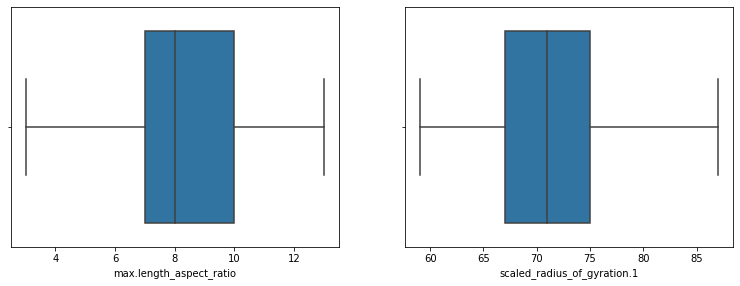

In [75]:
plt.figure(figsize= (20,15))

plt.subplot(3,3,2)
sns.boxplot(x= cleandf['scaled_radius_of_gyration.1'])

plt.subplot(3,3,1)
sns.boxplot(x= cleandf['max.length_aspect_ratio'])

The Outliers are removed

# Understanding the attributes

In [77]:
cleandf.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
compactness,1.000000,0.679327,0.786824,0.745988,0.200634,0.497660,0.810842,-0.788560,0.811866,0.674166,0.791464,0.812494,0.577688,-0.253678,0.200640,0.161106,0.295414,0.364160,-0.028066
circularity,0.679327,1.000000,0.786778,0.640936,0.206156,0.564159,0.843765,-0.815764,0.840162,0.961220,0.802762,0.832483,0.925142,0.066697,0.140391,-0.014342,-0.116832,0.039182,-0.150490
distance_circularity,0.786824,0.786778,1.000000,0.808331,0.245454,0.668833,0.905577,-0.908687,0.894783,0.768689,0.884133,0.888193,0.702483,-0.237938,0.098813,0.263508,0.128912,0.321655,-0.058524
radius_ratio,0.745988,0.640936,0.808331,1.000000,0.666209,0.460691,0.789523,-0.844025,0.763829,0.576791,0.792802,0.776142,0.550545,-0.403176,0.040306,0.187190,0.418354,0.504693,-0.225750
pr.axis_aspect_ratio,0.200634,0.206156,0.245454,0.666209,1.000000,0.138261,0.199971,-0.301918,0.169752,0.145857,0.214810,0.186297,0.153509,-0.325102,-0.051539,-0.028583,0.406292,0.419801,-0.216582
max.length_aspect_ratio,0.497660,0.564159,0.668833,0.460691,0.138261,1.000000,0.497466,-0.502377,0.497233,0.647844,0.411562,0.457892,0.404288,-0.332752,0.084005,0.140972,0.056416,0.394449,0.371072
scatter_ratio,0.810842,0.843765,0.905577,0.789523,0.199971,0.497466,1.000000,-0.972340,0.989441,0.807070,0.977548,0.992982,0.794915,0.002444,0.063471,0.214182,-0.003100,0.116181,-0.283363
elongatedness,-0.788560,-0.815764,-0.908687,-0.844025,-0.301918,-0.502377,-0.972340,1.000000,-0.949943,-0.770034,-0.964903,-0.955797,-0.762407,0.086977,-0.045458,-0.183955,-0.105264,-0.211086,0.337818
pr.axis_rectangularity,0.811866,0.840162,0.894783,0.763829,0.169752,0.497233,0.989441,-0.949943,1.000000,0.810349,0.963794,0.987773,0.792197,0.017769,0.072726,0.216626,-0.026470,0.097951,-0.251226
max.length_rectangularity,0.674166,0.961220,0.768689,0.576791,0.145857,0.647844,0.807070,-0.770034,0.810349,1.000000,0.749677,0.794071,0.866940,0.052585,0.134630,-0.002441,-0.117667,0.067177,-0.025047


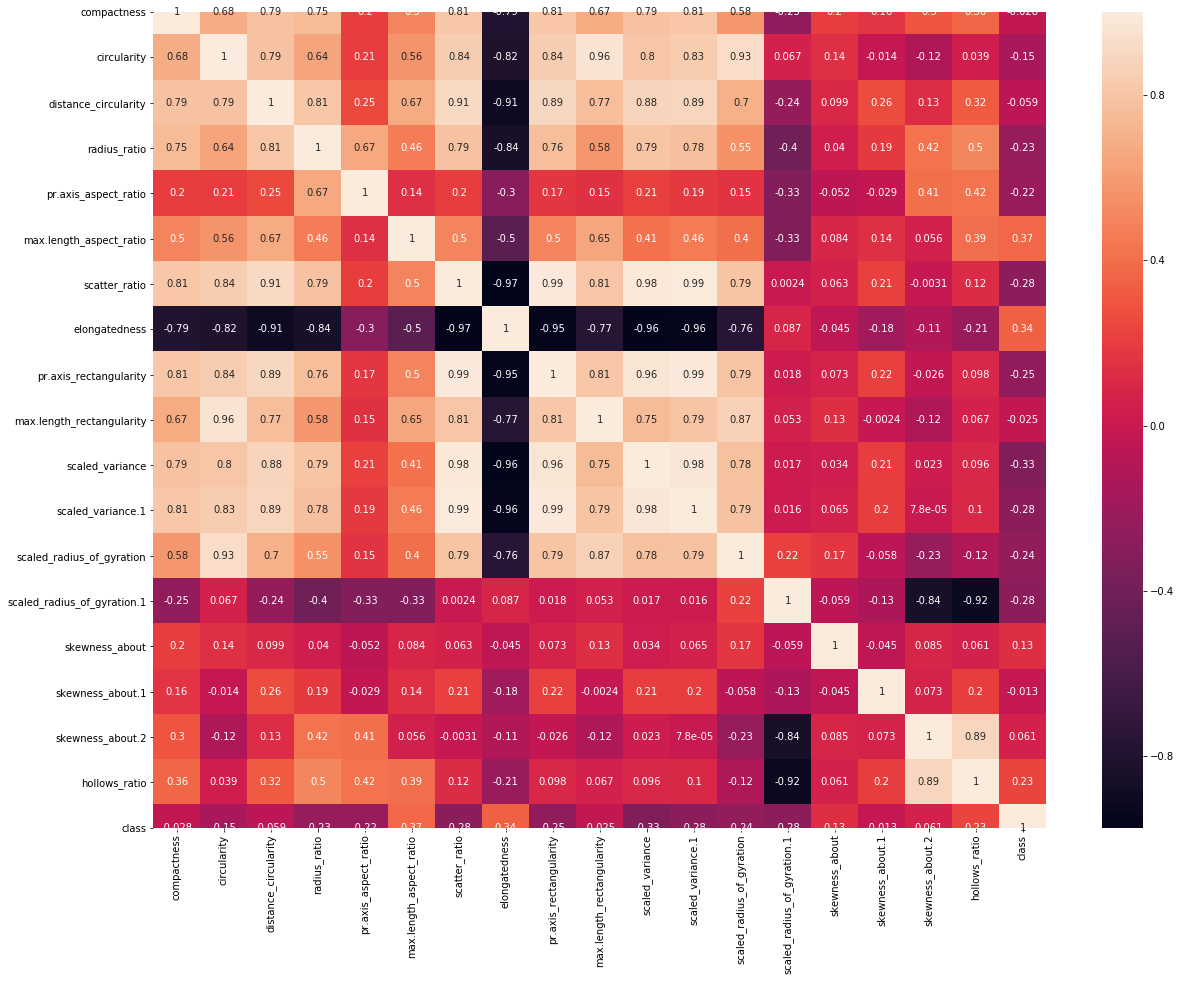

In [76]:
#Using HeatMap to Identify the Correlation 
plt.subplots(figsize=(20,15))
sns.heatmap(cleandf.corr(),annot=True)

# Use PCA to Reduce the Number of Dimensions

In [79]:
X = newdf.iloc[:,0:18].values
y = newdf.iloc[:,18].values

In [81]:
sc = StandardScaler()
X_std =  sc.fit_transform(X)  

In [85]:
#Covariance Matrix
cov_matrix = np.cov(X_std.T)
print("cov_matrix shape:",cov_matrix.shape)

cov_matrix shape: (18, 18)


In [86]:
#Eigen Values and Eigen Vectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

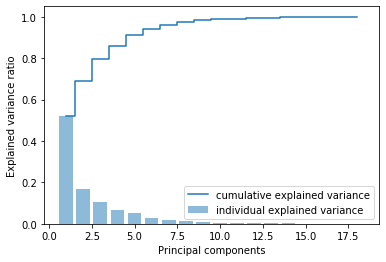

In [87]:
## To Plot the Explained Variance and Principal components
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  
cum_var_exp = np.cumsum(var_explained) 

plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [91]:
#Sorting the Eigenvalues in Descending order to Identify the top 8 Eigen values to be used for Dimension reduction
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

In [92]:
#Dimension Reduction 
P_reduce = np.array(eigvectors_sorted[0:8])   # Reducing from 8 to 4 dimension space

X_std_8D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

reduced_pca = pd.DataFrame(X_std_8D)  # converting array to dataframe for pairplot

reduced_pca

,0,1,2,3,4,5,6,7
0,0.334162,0.219026,1.001584,0.176612,0.079301,0.757447,0.901124,-0.381106
1,-1.591711,0.420603,-0.369034,0.233234,0.693949,0.517162,-0.378637,0.247059
2,3.769324,-0.195283,0.087859,1.202212,0.731732,-0.705041,0.034584,0.482772
3,-1.738598,2.829692,0.109456,0.376685,-0.362897,0.484431,-0.470753,-0.023086
4,0.558103,-4.758422,11.703647,0.147464,3.256953,0.203446,-2.671578,-0.448854
...,...,...,...,...,...,...,...,...
841,-0.442648,0.605884,0.197213,-1.444958,1.065425,-0.820179,0.041563,0.506991
842,-0.314956,-0.164511,0.794573,-0.908272,-0.235492,1.438257,0.599113,-0.153086
843,4.809174,0.001249,0.532333,0.295652,-1.344236,0.217070,-0.573249,0.110478
844,-3.294092,1.008276,-0.357003,-1.933675,0.042768,0.402491,0.202406,0.320622


# Building an SVM model with the reduced dimensions derived from PCA

In [94]:
svc = svm.SVC()

In [98]:
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(reduced_pca,y,test_size=0.30,random_state=1)

In [99]:
svc.fit(pca_X_train,pca_y_train)

C:\Users\Bala\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [100]:
pca_y_predict = svc.predict(pca_X_test)

In [103]:
print(accuracy_score(pca_y_test,pca_y_predict))

0.9330708661417323


In [106]:
# Using Grid Search to find the accuracy rate 

param_grid = [
  {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear']},
  {'C': [0.01, 0.05, 0.5, 1],  'kernel': ['rbf']},
 ]

n_folds = 10

# Instantiate the grid search model
svctune = svm.SVC()
grid_search = GridSearchCV(estimator = svctune, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(pca_X_train,pca_y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Bala\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Bala\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Bala\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear']},
                         {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [107]:
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

best accuracy 0.9358108108108109
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
{'C': 1, 'kernel': 'rbf'}
